## 머신러닝
# 로지스틱회귀 (Logistic Regression)

### 선형회귀와의 차이점
- 분류 알고리즘이다
- 시그모이드(sigmoid) 함수를 적용하여 0과 1을 구분한다
> $ \hat{y} = sigmoid( w_1 x_1 + w_2 x_2 + w_3 x_3 + b ) $ <br>
> $ \sigma (t) = 1/(1+e^{-t}) $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 시그모이드 함수 그리기

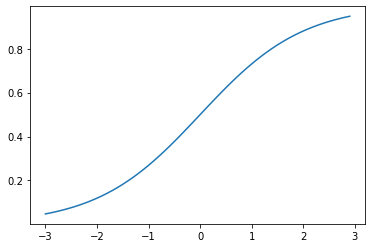

In [5]:
xs = np.arange(-3, 3, 0.1)
ys = 1/(1 + np.exp(-xs))

plt.plot(xs, ys)

### 아이리스 데이터에 적용


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

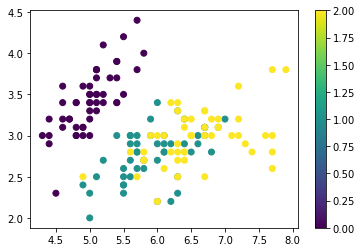

In [3]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.colorbar()

- X : 앞의 두 속성 (sepal_length, sepal_width)
- y : 품종값 (setosa: 0, versicolor & verginica: 1)

In [52]:
X = iris.data[:, :2]
y = np.array([0]*50 + [1]*100) # np.where(iris.target>0, 1, 0)
X.shape, y.shape

((150, 2), (150,))

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
model.score(X, y)

1.0

### 결과분석

In [57]:
model.coef_ # [w1, w2]

array([[ 3.38829757, -3.1645277 ]])

In [58]:
model.intercept_ # b

array([-8.32330389])

In [59]:
w = model.coef_[0]
b = model.intercept_[0]
w, b

(array([ 3.38829757, -3.1645277 ]), -8.323303886430965)

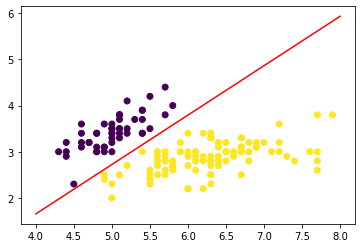

In [60]:
xs = np.array([4,8])
ys = -(w[0]*xs + b)/w[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xs, ys, 'r')

### 옵션 C
- C 값이 클수록 정밀한 경계선을 그린다

In [23]:
help(LogisticRegression) # C=1.0

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [61]:
model = LogisticRegression(C = 0.05)
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
w = model.coef_[0]
b = model.intercept_[0]
w, b

(array([ 1.03760206, -0.65027373]), -3.244516278324647)

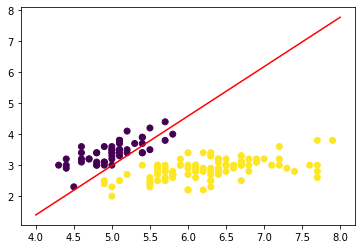

In [63]:
xs = np.array([4,8])
ys = -(w[0]*xs + b)/w[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xs, ys, 'r')

### versicolor 와 virginica 구분

In [4]:
X = iris.data[50:, [0,1]]
y = np.array([0]*50 + [1]*50)
X.shape, y.shape

((100, 2), (100,))

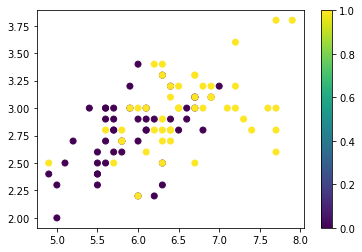

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [9]:
model.score(X, y)

0.75

In [10]:
w = model.coef_[0]
b = model.intercept_[0]
w, b

(array([1.5890194 , 0.40894657]), -11.105898614396429)

(1.5, 4.5)

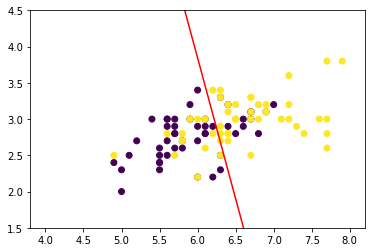

In [11]:
xs = np.array([4,8])
ys = -(w[0]*xs + b)/w[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xs, ys, 'r')
plt.ylim([1.5, 4.5])

### mglearn 모듈 설치
- "파이썬 라이브러리를 활용한 머신러닝" 교재의 저자가 작성한 교육용 모듈
- pip install mglearn

In [9]:
import mglearn

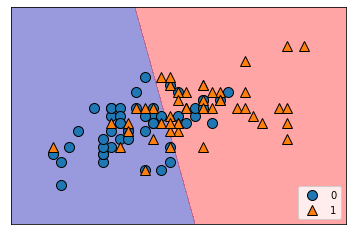

In [10]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(loc=4)

In [11]:
model.predict_proba(X)

array([[0.20984396, 0.79015604],
       [0.40794804, 0.59205196],
       [0.24488716, 0.75511284],
       [0.80623275, 0.19376725],
       [0.40907807, 0.59092193],
       [0.71165542, 0.28834458],
       [0.43672917, 0.56327083],
       [0.91199427, 0.08800573],
       [0.36179668, 0.63820332],
       [0.85053991, 0.14946009],
       [0.9123689 , 0.0876311 ],
       [0.62336236, 0.37663764],
       [0.66197317, 0.33802683],
       [0.55649157, 0.44350843],
       [0.73525395, 0.26474605],
       [0.30826017, 0.69173983],
       [0.72721738, 0.27278262],
       [0.68684929, 0.31315071],
       [0.58765892, 0.41234108],
       [0.76584984, 0.23415016],
       [0.60397491, 0.39602509],
       [0.56656006, 0.43343994],
       [0.51816948, 0.48183052],
       [0.56656006, 0.43343994],
       [0.43787996, 0.56212004],
       [0.35240848, 0.64759152],
       [0.3005913 , 0.6994087 ],
       [0.31704806, 0.68295194],
       [0.59528017, 0.40471983],
       [0.72814412, 0.27185588],
       [0.

### 다중분류 (클래스가 3개 이상인 경우)
- 로지스틱회귀에서 기본적으로는 2개의 클래스만 구분한다 (0과 1)
- 다중분류일 경우 소프트맥스(softmax) 함수를 적용한 일대다(ovr: one vs rest) 방식을 적용하다는 것이 일반적이다
> softmax 함수는 신경망에서 중요하게 다루어진다

In [16]:
help(LogisticRegression) # multi_class, solver 옵션 참고

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [17]:
X = iris.data[:, :2]
y = iris.target # 0,1,2 세 가지 품종을 분류
X.shape, y.shape

((150, 2), (150,))

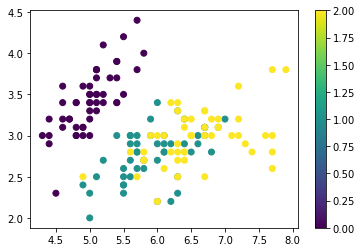

In [18]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [19]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [20]:
model.score(X, y)

0.82

In [21]:
w = model.coef_
b = model.intercept_
w, b

(array([[-2.70890249,  2.32402378],
        [ 0.61273259, -1.57058803],
        [ 2.0961699 , -0.75343574]]),
 array([ 7.91322129,  1.84504714, -9.75826843]))

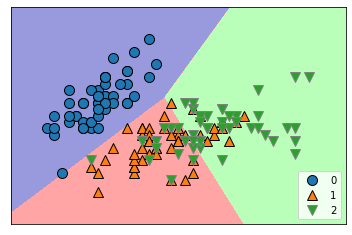

In [23]:
mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(loc=4)

### 모든 속성 사용

In [13]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

- score 확인
- y 와 y_pred 비교
- predict_proba 로 확률 확인
- versicolor(1) 인데 virginica(2) 로 판별한 샘플은 어떤 것들인가?
- w(가중치) 와 b(절편값) 확인

In [14]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
model.score(X, y)

0.9733333333333334

In [16]:
model.predict_proba(X)

array([[9.81807257e-01, 1.81927283e-02, 1.43681875e-08],
       [9.71738201e-01, 2.82617692e-02, 3.00548363e-08],
       [9.85456446e-01, 1.45435414e-02, 1.22784164e-08],
       [9.76304880e-01, 2.36950800e-02, 3.95765844e-08],
       [9.85392345e-01, 1.46076429e-02, 1.18955739e-08],
       [9.70475876e-01, 2.95240509e-02, 7.32321106e-08],
       [9.86894907e-01, 1.31050732e-02, 1.99020837e-08],
       [9.76409984e-01, 2.35899885e-02, 2.75229377e-08],
       [9.79851928e-01, 2.01480415e-02, 3.05776181e-08],
       [9.69144938e-01, 3.08550304e-02, 3.15303298e-08],
       [9.76514629e-01, 2.34853518e-02, 1.91404021e-08],
       [9.75418379e-01, 2.45815768e-02, 4.36858514e-08],
       [9.74570223e-01, 2.54297557e-02, 2.14051139e-08],
       [9.91976744e-01, 8.02325190e-03, 3.87961003e-09],
       [9.88209236e-01, 1.17907612e-02, 2.79478005e-09],
       [9.86779511e-01, 1.32204767e-02, 1.27324591e-08],
       [9.88122147e-01, 1.18778434e-02, 9.15973768e-09],
       [9.81564058e-01, 1.84359

In [30]:
model.coef_

array([[-0.41855848,  0.96683153, -2.52115538, -1.08412164],
       [ 0.53117468, -0.31465493, -0.19977982, -0.94885323],
       [-0.1126162 , -0.6521766 ,  2.7209352 ,  2.03297486]])

In [31]:
model.intercept_

array([  9.83993375,   2.21614474, -12.05607848])

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
y != y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
(y!=y_pred).sum()

4

In [22]:
np.where(y!=y_pred)

(array([ 70,  77,  83, 106], dtype=int64),)

In [23]:
y[70], y_pred[70]

(1, 2)

In [24]:
y[[ 70,  77,  83, 106]]

array([1, 1, 1, 2])

In [25]:
y_pred[[ 70,  77,  83, 106]]

array([2, 2, 2, 1])